# Zero-Shot Image Classification

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as similar images or texts are projected into the same vector space.




We can use this to perform zero-shot image classification by providing the names for the labels.



we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

Dog Cat Dataset

https://github.com/laxmimerit/dog-cat-full-dataset.git


## Zero Shot Learning

Zero-shot learning allows a model to recognize what it hasn’t seen before.

It solve a task despite not having received any training examples of that task.


In [1]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.6 MB/s 
     |████████████████████████████████| 5.8 MB 34.1 MB/s 
     |████████████████████████████████| 1.3 MB 53.8 MB/s 
     |████████████████████████████████| 182 kB 77.2 MB/s 
     |████████████████████████████████| 7.6 MB 56.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=8e6479aaed497d1c2e176d7dddd5cb18525e49a064eb2d5539a5809b08a9195a
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch

In [3]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 20.67 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [4]:
dog_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/dogs/*jpg'))[:100]
cat_names = list(glob.glob('/content/dog-cat-full-dataset/data/train/cats/*jpg'))[:100]
img_names = dog_names + cat_names

In [5]:
from random import shuffle
shuffle(img_names)

In [6]:
model = SentenceTransformer('clip-ViT-B-32')
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

In [15]:
labels = ['dog', 'cat']

label_embed = model.encode(labels, convert_to_tensor=True)
cos_scores = util.cos_sim(img_embed, label_embed)

In [16]:
cos_scores.shape

torch.Size([200, 2])

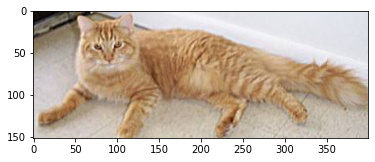

Predicted Label: cat
-----




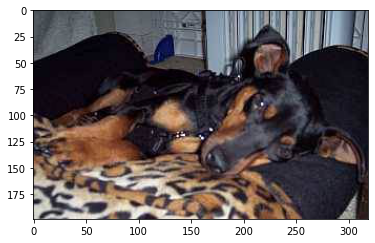

Predicted Label: dog
-----




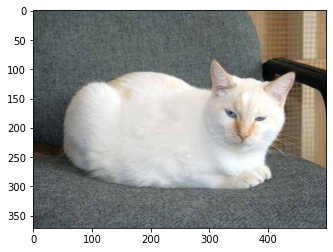

Predicted Label: cat
-----




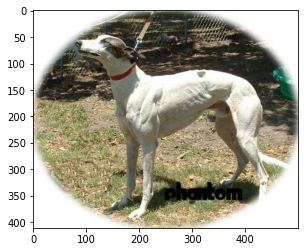

Predicted Label: dog
-----




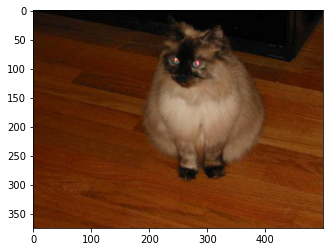

Predicted Label: cat
-----




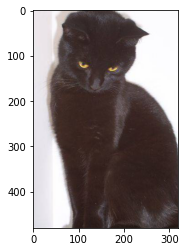

Predicted Label: cat
-----




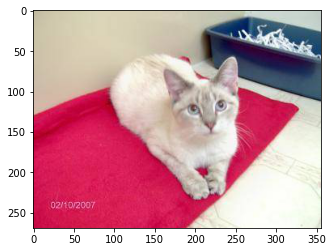

Predicted Label: cat
-----




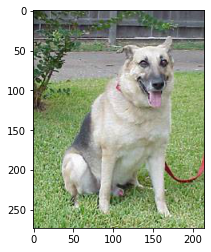

Predicted Label: dog
-----




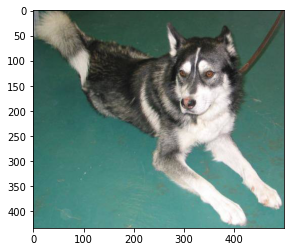

Predicted Label: dog
-----




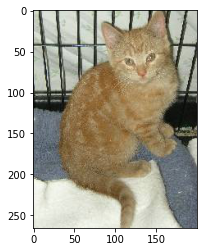

Predicted Label: cat
-----




In [17]:
pred_labels = torch.argmax(cos_scores, dim=1)

for img_name, pred_label in zip(img_names[0:10], pred_labels[0:10]):
  im = Image.open(img_name)
  plt.figure()
  plt.imshow(im)
  plt.show()
  print("Predicted Label:", labels[pred_label])
  print("-----\n\n")